<a href="https://colab.research.google.com/github/vrose99/ds4bme/blob/master/Quiz4_vrose9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Victoria Rose
### vrose9@jh.edu
### Quiz 4

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm

# Question 1

In [3]:
# Download in the data if it's not already there
! if [ ! -e kirby21.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi;

# Read in the data and display a few rows
dat = pd.read_csv("kirby21.csv")
#dat['csf'] = dat['icv'] - dat['tbv'] 
dat.head()

--2019-09-27 11:43:00--  https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1611966 (1.5M) [text/plain]
Saving to: ‘kirby21.csv’

kirby21.csv         100%[===================>]   1.54M  --.-KB/s    in 0.08s   

2019-09-27 11:43:00 (20.2 MB/s) - ‘kirby21.csv’ saved [1611966/1611966]



,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


In [4]:
# Make a data Frame
df = pd.read_csv("kirby21.csv")
df_L = df.loc[df['roi']=='Diencephalon_L']
df_R = df.loc[df['roi']=='Diencephalon_R']
df_y = df.loc[df['roi']=='CSF']
#df_L.head()
#df_R.head()
x1 = df_L['volume'].tolist()
x2 = df_R['volume'].tolist()
y_temp = df_y['volume'].tolist()
y = []
for i in range(len(y_temp)):
  if i % 2 == 0:
    y.append(y_temp[i])
#will be the same whether taken from df_L or df_R
#pred = pd.DataFrame([x1, x2, y],columns=['x1','x2','y'])
df = pd.DataFrame([x1,x2,y])
df = df.transpose()
df.columns = ['x1','x2','y']
df.head()

,x1,x2,y
0,9683,9678,109776
1,9156,9071,107334
2,8937,9004,94254
3,8828,8933,67156
4,9749,9722,110114


In [5]:
results = smf.ols('y ~ x1+ x2', data = df).fit()
print(results.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.128     
Dependent Variable:   y                 AIC:                 454.0017  
Date:                 2019-09-27 11:43  BIC:                 456.9889  
No. Observations:     20                Log-Likelihood:      -224.00   
Df Model:             2                 F-statistic:         2.394     
Df Residuals:         17                Prob (F-statistic):  0.121     
R-squared:            0.220             Scale:               3.6842e+08
-----------------------------------------------------------------------
            Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------
Intercept -2449.7146 59324.5017 -0.0413 0.9675 -127613.4723 122714.0432
x1           23.9403    21.0337  1.1382 0.2708     -20.4370     68.3175
x2          -13.7653    23.3248 -0.5902 0.5628     -62.9763     35.4458
------------

#### Interpret the Coefficients

The coefficients for x1 and x2 represent how much a one unit change of that particular variable (one more cubic mm of left or right diencephalon) would change the estimated CSF volume if the other variable were held constant.

# Question 2

In [6]:
# Download in the data if it's not already there
! if [ ! -e binary.csv ]; \
then wget https://stats.idre.ucla.edu/stat/data/binary.csv; \
fi;

--2019-09-27 11:43:01--  https://stats.idre.ucla.edu/stat/data/binary.csv
Resolving stats.idre.ucla.edu (stats.idre.ucla.edu)... 128.97.141.21
Connecting to stats.idre.ucla.edu (stats.idre.ucla.edu)|128.97.141.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5489 (5.4K) [text/csv]
Saving to: ‘binary.csv’

binary.csv          100%[===================>]   5.36K  --.-KB/s    in 0s      

2019-09-27 11:43:02 (322 MB/s) - ‘binary.csv’ saved [5489/5489]



In [7]:
dat = pd.read_csv("binary.csv")
dat.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [8]:
trainFraction = .75
x = dat[['gre','gpa','rank']]
y = dat[['admit']]
x = sm.tools.add_constant(x)
sample = np.random.uniform(size = 400) < trainFraction
trainingDat = dat[sample]
testingDat = dat[~sample]
xtraining = x[sample]
xtesting = x[~sample]
ytraining = y[sample]
ytesting = y[~sample]
model = sm.discrete.discrete_model.Logit(ytraining, xtraining).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.582257
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  307
Model:                          Logit   Df Residuals:                      303
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Sep 2019   Pseudo R-squ.:                 0.07390
Time:                        11:43:02   Log-Likelihood:                -178.75
converged:                       True   LL-Null:                       -193.02
Covariance Type:            nonrobust   LLR p-value:                 2.812e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8208      1.306     -2.161      0.031      -5.380      -0.262
gre            0.0018      0.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Part b:
The coefficients for gre, gpa, and rank represent how much a one unit change of that particular variable would change the output if all other variables were held constant. Ie: an increase in gre score by one point, with no change in gpa or rank, would be anticipated to increase the output by 0.0018 based off of this model

In [0]:
thresh = np.arange(0,1,0.01).tolist()
yhat = model.predict(xtesting).tolist()
ytesting = ytesting.values
yhat_temp = np.zeros(len(yhat))
results = np.zeros((len(thresh),4))
for j in range(len(thresh)):
  true_pos = 0
  true_neg = 0
  false_pos = 0
  false_neg = 0
  for k in range(len(yhat)):
    if yhat[k] >= thresh[j]:
      yhat_temp[k] = 1
    else:
      yhat_temp[k] = 0
  #print(yhat_temp)
  for i in range(len(yhat)):
    if (yhat_temp[i] == 1) and (ytesting[i] == 1): #true pos
      true_pos += 1
    elif (yhat_temp[i] == 1) and (ytesting[i] == 0): 
      false_pos += 1
    elif (yhat_temp[i] == 0) and (ytesting[i] == 0):
      true_neg += 1
    else:
      false_neg += 1
  results[j,0] = true_pos
  results[j,1] = false_pos
  results[j,2] = true_neg
  results[j,3] = false_neg
    

In [0]:
sensitivity = np.zeros(len(results[:,0]))
specificity = np.zeros(len(results[:,0]))
#accuracy = np.zeros(len(results[:,0]))
good = results[:,0] + results[:,3]
total = sum(results[1,:])
accuracy = good/total
for i in range(len(results[:,0])):
  sensitivity[i] = results[i,0]/(results[i,0]+results[i,3])
  specificity[i] = results[i,2]/(results[i,2]+results[i,1])
  accuracy[i] = (results[i,0]+results[i,2])/(sum(results[1,:]))
  #print(sum)

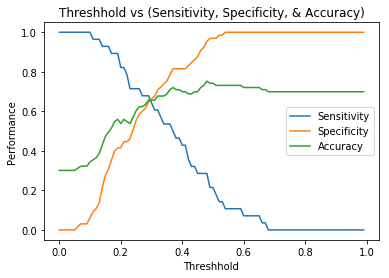

In [11]:
plt.figure()
plt.plot(thresh,sensitivity)
plt.plot(thresh,specificity)
plt.plot(thresh,accuracy)
plt.title('Threshhold vs (Sensitivity, Specificity, & Accuracy)')
plt.ylabel('Performance')
plt.xlabel('Threshhold')
plt.legend(['Sensitivity','Specificity','Accuracy'])


# Question 3

This is a set of average temperatures,time, location, latitude, and longitude--I want to see if from latitude, longitude, month, and year, we can predict average temperature. A lot of what I did for this quiz was just cleaning the features so that instead of %Y-%m-%d it had year & month as separate variables and can be used for features

In [61]:
df = pd.read_csv('https://query.data.world/s/5mzqvsmlvbvkshr7rh35onrfpvol4b')
df = df.dropna()
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


Cleaning the time of year

In [62]:
df['year'] = df['dt'].str[:4].astype(int)
df['month'] = df['dt'].str[5:7].astype(int)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5


Cleaning the latitude and longitude

In [63]:
df['Latitude'] = df['Latitude'].str[:4].astype(float)
df['Longitude'] = df['Longitude'].str[:4].astype(float)
df.head()
#type(df['AverageTemperature'].iloc[0])

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,3.23,1849,1
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,3.23,1849,2
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,3.23,1849,3
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,3.23,1849,4
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,3.23,1849,5


In [0]:
# Assign variables
x1 = df['Latitude']
x2 = df['Longitude']
x3 = df['year']
x4 = df['month']
y = df['AverageTemperature']

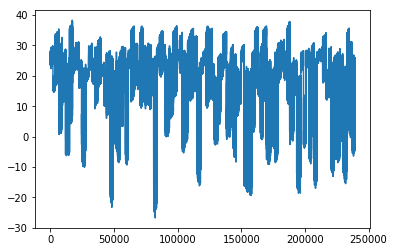

In [70]:
# For visualization going to color temperature generally into chunks for visualization purposes but first need to get an idea of what the range is
plt.plot(y)

In [0]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
iris = px.data.iris()

fig = px.scatter_matrix(iris, 
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species")
fig.show()

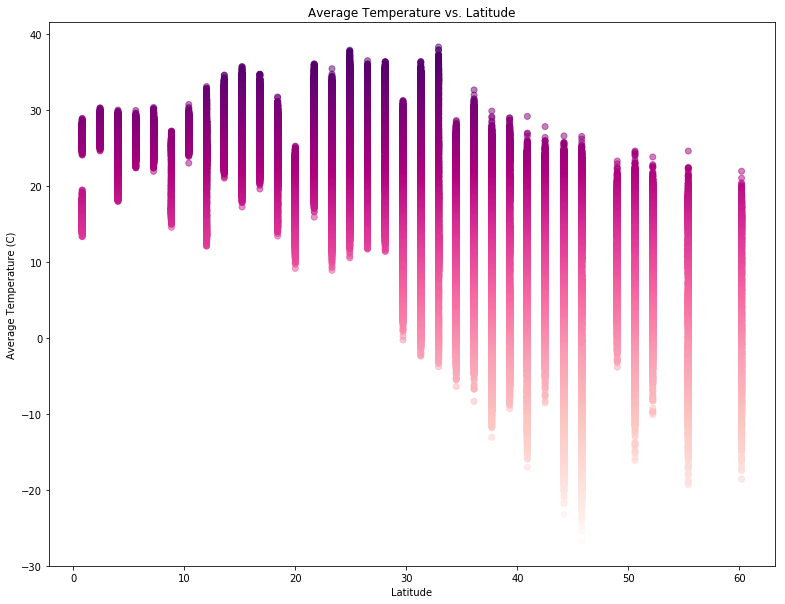

In [74]:
#figure
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Average Temperature (C)')
ax1.set_title('Average Temperature vs. Latitude')

#plot
plt.scatter( x1,y , c=y,cmap = 'RdPu', alpha =0.5)
#cbar = plt.colorbar()
#cbar.set_label('Color Intensity')

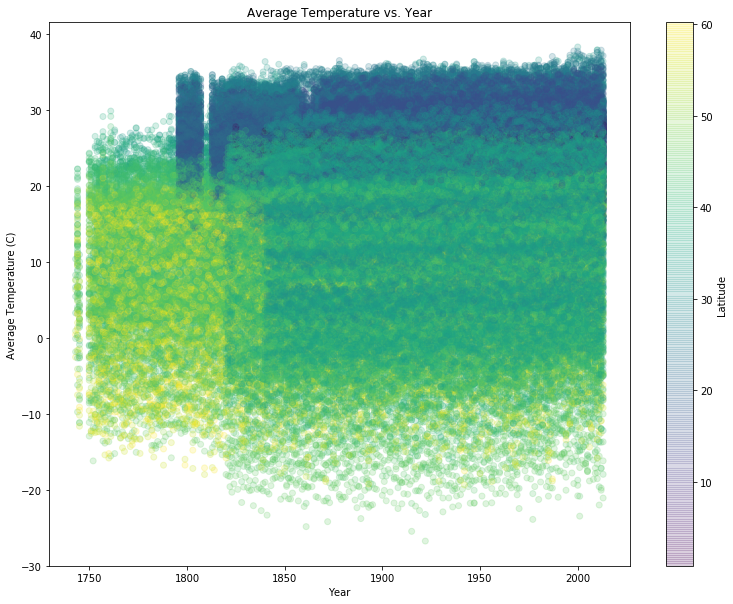

In [76]:
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (C)')
ax1.set_title('Average Temperature vs. Year')

#plot
plt.scatter( x3,y , c=x1 ,cmap = 'viridis', alpha =0.2)
cbar = plt.colorbar()
cbar.set_label('Latitude')